<a href="https://colab.research.google.com/github/sam1610/AWS_ML/blob/main/Churn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| <font size="5">Supervising Learning : Classification</font>||
|-|-|
||<img src="https://www.tibco.com/blog/wp-content/uploads/2013/04/telco-churn.jpg" width=300></img>|
|<font size="4"> DataSet loading  </font>| |
|<font size="4">    DataSet Processing</font>| |
|<font size="4">    DataSet Training</font>| |
|<font size="4">    Prediction & Algorithm Evaluation</font>| |

### Git Repo : https://github.com/sam1610/AHliaML



- Abstract— Telecommunication market is expanding day by
day. Companies are facing a severe loss of revenue due to
increasing competition hence the loss of customers. They are
trying to find the reasons of losing customers by measuring
customer loyalty to regain the lost customers.


In [ ]:
# ! pip install scikit-learn -U
!pip install scikit-learn #==0.23.1

In [ ]:
! python --version

Python 3.10.12


In [ ]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd  drive/My\ Drive/ML/ML_iOT_Project/Machine_Learning

/content/drive/My Drive/ML/ML_iOT_Project/Machine_Learning


In [ ]:
!wget http://dataminingconsultant.com/DKD2e_data_sets.zip   -P  ./Data
!unzip -o ./Data/DKD2e_data_sets.zip

--2024-05-13 11:47:08--  http://dataminingconsultant.com/DKD2e_data_sets.zip
Resolving dataminingconsultant.com (dataminingconsultant.com)... 3.33.130.190, 15.197.148.33
Connecting to dataminingconsultant.com (dataminingconsultant.com)|3.33.130.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114 [text/html]
Saving to: ‘./Data/DKD2e_data_sets.zip.9’

DKD2e_data_sets.zip 100%[===================>]     114  --.-KB/s    in 0s      

2024-05-13 11:47:08 (9.34 MB/s) - ‘./Data/DKD2e_data_sets.zip.9’ saved [114/114]

Archive:  ./Data/DKD2e_data_sets.zip
 extracting: Data sets/adult.zip     
  inflating: Data sets/cars.txt      
  inflating: Data sets/cars2.txt     
  inflating: Data sets/cereals.CSV   
  inflating: Data sets/churn.txt     
  inflating: Data sets/ClassifyRisk  
  inflating: Data sets/ClassifyRisk - Missing.txt  
 extracting: Data sets/DKD2e data sets.zip  
  inflating: Data sets/nn1.txt       


In [ ]:
ls  ./Data


 adult.zip            churn_target.csv              DKD2e_data_sets.zip.1   DKD2e_data_sets.zip.7
 cars2.txt            churn.txt                     DKD2e_data_sets.zip.2   DKD2e_data_sets.zip.8
 cars.txt             ClassifyRisk                  DKD2e_data_sets.zip.3   DKD2e_data_sets.zip.9
 cereals.CSV         'ClassifyRisk - Missing.txt'   DKD2e_data_sets.zip.4   nn1.txt
 churn_1.csv         'DKD2e data sets.zip'          DKD2e_data_sets.zip.5
 churn_features.csv   DKD2e_data_sets.zip           DKD2e_data_sets.zip.6


In [ ]:
ls -la  ./Data/chu*

-rw------- 1 root root 298774 Oct 12  2021 ./Data/churn_1.csv
-rw------- 1 root root 202981 Sep 22  2020 ./Data/churn_features.csv
-rw------- 1 root root  22229 Sep 22  2020 ./Data/churn_target.csv
-rw------- 1 root root 437903 Jun 11  2017 ./Data/churn.txt


In [ ]:
! head -n 5  ./Data/churn.txt

State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.


## $$\Large  \text {DataSet Loading ...}$$

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

# Dataset Reading

df = pd.read_csv('./Data/churn.txt')


In [ ]:
df.sample(3)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
2131    OH              52        408  327-9289         no        yes   
1969    SD              52        510  358-6672         no        yes   
3156    IN              64        408  350-1126         no         no   

      VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
2131             31     142.1         77       24.16  ...         97   
1969             20     133.3         63       22.66  ...        123   
3156              0     113.8         97       19.35  ...         97   

      Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  \
2131       16.41       253.4           88         11.40       11.0   
1969       15.65       272.9          107         12.28       13.5   
3156       16.35       214.9           89          9.67       10.4   

      Intl Calls  Intl Charge  CustServ Calls  Churn?  
2131           4         2.97               1  False.  
1969           2         3.65               1  False.  
3156           1         2.81               3  False.  

[3 rows x 21 columns]

In [ ]:
df.shape

(3333, 21)


This is a relatively small dataset, with only 3,333 records, where each record uses 21 attributes to describe the profile of a customer of an unknown US mobile operator.  
### List of attributes:
- **State**: the US state in which the customer resides, indicated by a two-letter  - abbreviation; for example, OH or NJ
- **Account** Length: the number of days that this account has been active
- **Area Code**: the three-digit area code of the corresponding customer’s phone number
- **Phone**: the remaining seven-digit phone number
- **Int’l Plan**: whether the customer has an international calling plan: yes/no
- **VMail Plan**: whether the customer has a voice mail feature: yes/no
- **VMail Message**: presumably the average number of voice mail messages per month
- **Day Mins**: the total number of calling minutes used during the day
- **Day Calls**: the total number of calls placed during the day
- **Day Charge**: the billed cost of daytime calls
- **Eve Mins, Eve Calls, Eve Charge**: the billed cost for calls placed during the evening
- **Night Mins, Night Calls, Night Charge**: the billed cost for calls placed during nighttime
- **Intl Mins, Intl Calls, Intl Charge**: the billed cost for international calls
- **CustServ Calls**: the number of calls placed to Customer Service
- **Churn?**: whether the customer left the service: true/false

__The last attribute, Churn?, is known as the target attribute–the attribute that we want the ML model to predict. Because the target attribute is binary, our model will be performing binary prediction, also known as binary classification._

Let's begin exploring the data:

In [ ]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [ ]:
df['CustServ Calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

## $$\Large  \text {Data processing }$$
![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [ ]:
df['VMail Plan'].value_counts()

VMail Plan
no     2411
yes     922
Name: count, dtype: int64

In [ ]:
df[['VMail Plan']].describe()

VMail Plan
count        3333
unique          2
top            no
freq         2411

In [ ]:
df.describe().T

count        mean        std     min     25%     50%     75%  \
Account Length  3333.0  101.064806  39.822106    1.00   74.00  101.00  127.00   
Area Code       3333.0  437.182418  42.371290  408.00  408.00  415.00  510.00   
VMail Message   3333.0    8.099010  13.688365    0.00    0.00    0.00   20.00   
Day Mins        3333.0  179.775098  54.467389    0.00  143.70  179.40  216.40   
Day Calls       3333.0  100.435644  20.069084    0.00   87.00  101.00  114.00   
Day Charge      3333.0   30.562307   9.259435    0.00   24.43   30.50   36.79   
Eve Mins        3333.0  200.980348  50.713844    0.00  166.60  201.40  235.30   
Eve Calls       3333.0  100.114311  19.922625    0.00   87.00  100.00  114.00   
Eve Charge      3333.0   17.083540   4.310668    0.00   14.16   17.12   20.00   
Night Mins      3333.0  200.872037  50.573847   23.20  167.00  201.20  235.30   
Night Calls     3333.0  100.107711  19.568609   33.00   87.00  100.00  113.00   
Night Charge    3333.0    9.039325   2.275873    1.04    7.52    9.05   10.59   
Intl Mins       3333.0   10.237294   2.791840    0.00    8.50   10.30   12.10   
Intl Calls      3333.0    4.479448   2.461214    0.00    3.00    4.00    6.00   
Intl Charge     3333.0    2.764581   0.753773    0.00    2.30    2.78    3.27   
CustServ Calls  3333.0    1.562856   1.315491    0.00    1.00    1.00    2.00   

                   max  
Account Length  243.00  
Area Code       510.00  
VMail Message    51.00  
Day Mins        350.80  
Day Calls       165.00  
Day Charge       59.64  
Eve Mins        363.70  
Eve Calls       170.00  
Eve Charge       30.91  
Night Mins      395.00  
Night Calls     175.00  
Night Charge     17.77  
Intl Mins        20.00  
Intl Calls       20.00  
Intl Charge       5.40  
CustServ Calls    9.00

In [ ]:
import matplotlib.pyplot as plt


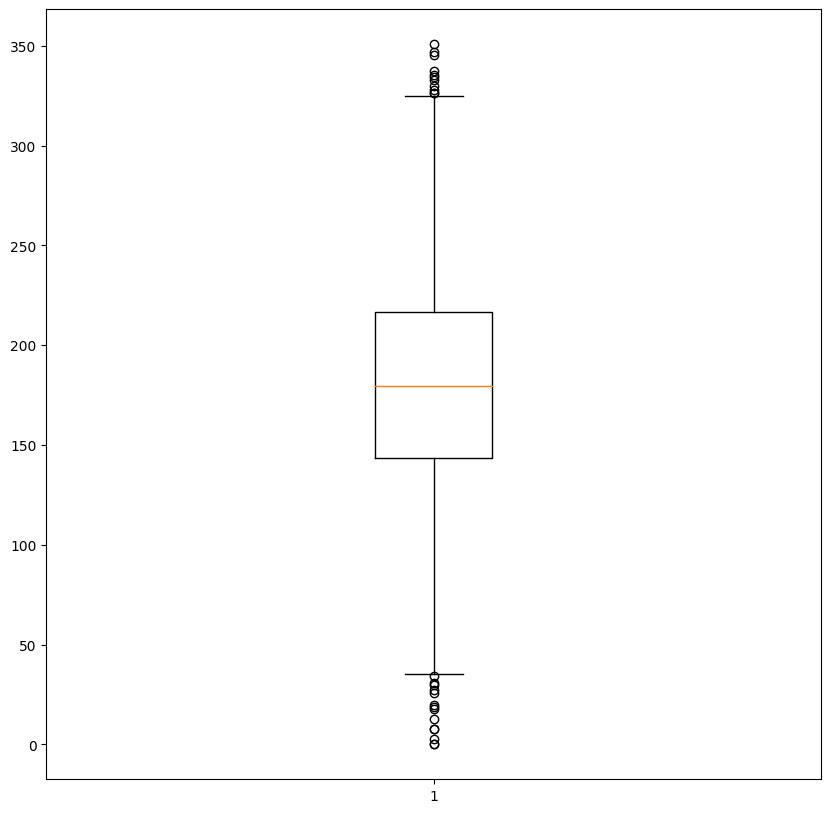

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Day Mins'])
plt.show()

(array([ 922.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2411.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

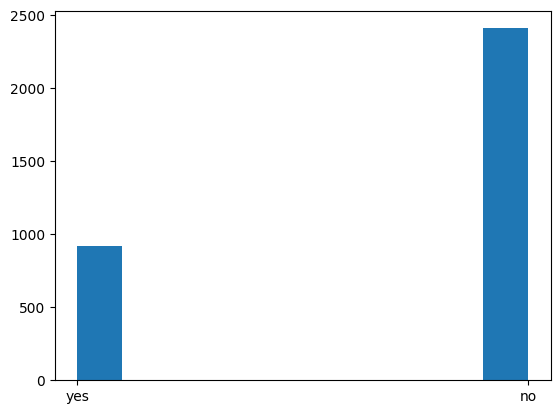

In [ ]:
plt.hist(df["VMail Plan"])

In [ ]:
# Frequency tables for each categorical feature
# better Presentation
display(pd.crosstab(df['VMail Plan'], columns='% observations'
                    ,normalize=True))

col_0       % observations
VMail Plan                
no                0.723372
yes               0.276628

In [ ]:
df.select_dtypes("object").columns

Index(['State', 'Phone', 'Int'l Plan', 'VMail Plan', 'Churn?'], dtype='object')

In [ ]:
df.select_dtypes(exclude="object").columns

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [ ]:
for col in df.select_dtypes("object").columns:
  print(col)

State
Phone
Int'l Plan
VMail Plan
Churn?


In [ ]:
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [ ]:
# Frequency tables for each categorical feature
for col in df.select_dtypes("object").columns:
    display(pd.crosstab(df[col], columns='% observations', normalize="columns" ))
# Normalize by dividing all values by the sum of values
# https://pbpython.com/pandas-crosstab.html

col_0  % observations
State                
AK           0.015602
AL           0.024002
AR           0.016502
AZ           0.019202
CA           0.010201
CO           0.019802
CT           0.022202
DC           0.016202
DE           0.018302
FL           0.018902
GA           0.016202
HI           0.015902
IA           0.013201
ID           0.021902
IL           0.017402
IN           0.021302
KS           0.021002
KY           0.017702
LA           0.015302
MA           0.019502
MD           0.021002
ME           0.018602
MI           0.021902
MN           0.025203
MO           0.018902
MS           0.019502
MT           0.020402
NC           0.020402
ND           0.018602
NE           0.018302
NH           0.016802
NJ           0.020402
NM           0.018602
NV           0.019802
NY           0.024902
OH           0.023402
OK           0.018302
OR           0.023402
PA           0.013501
RI           0.019502
SC           0.018002
SD           0.018002
TN           0.015902
TX           0.021602
UT           0.021602
VA           0.023102
VT           0.021902
WA           0.019802
WI           0.023402
WV           0.031803
WY           0.023102

col_0     % observations
Phone                   
327-1058          0.0003
327-1319          0.0003
327-3053          0.0003
327-3587          0.0003
327-3850          0.0003
...                  ...
422-7728          0.0003
422-8268          0.0003
422-8333          0.0003
422-8344          0.0003
422-9964          0.0003

[3333 rows x 1 columns]

col_0       % observations
Int'l Plan                
no                 0.90309
yes                0.09691

col_0       % observations
VMail Plan                
no                0.723372
yes               0.276628

col_0   % observations
Churn?                
False.        0.855086
True.         0.144914




- *notice that only  14% of customers churned (leave). We are dealing with an **Imbalanced** data.*

In [ ]:
# Histograms for each numeric features
df.describe().T


count        mean        std     min     25%     50%     75%  \
Account Length  3333.0  101.064806  39.822106    1.00   74.00  101.00  127.00   
Area Code       3333.0  437.182418  42.371290  408.00  408.00  415.00  510.00   
VMail Message   3333.0    8.099010  13.688365    0.00    0.00    0.00   20.00   
Day Mins        3333.0  179.775098  54.467389    0.00  143.70  179.40  216.40   
Day Calls       3333.0  100.435644  20.069084    0.00   87.00  101.00  114.00   
Day Charge      3333.0   30.562307   9.259435    0.00   24.43   30.50   36.79   
Eve Mins        3333.0  200.980348  50.713844    0.00  166.60  201.40  235.30   
Eve Calls       3333.0  100.114311  19.922625    0.00   87.00  100.00  114.00   
Eve Charge      3333.0   17.083540   4.310668    0.00   14.16   17.12   20.00   
Night Mins      3333.0  200.872037  50.573847   23.20  167.00  201.20  235.30   
Night Calls     3333.0  100.107711  19.568609   33.00   87.00  100.00  113.00   
Night Charge    3333.0    9.039325   2.275873    1.04    7.52    9.05   10.59   
Intl Mins       3333.0   10.237294   2.791840    0.00    8.50   10.30   12.10   
Intl Calls      3333.0    4.479448   2.461214    0.00    3.00    4.00    6.00   
Intl Charge     3333.0    2.764581   0.753773    0.00    2.30    2.78    3.27   
CustServ Calls  3333.0    1.562856   1.315491    0.00    1.00    1.00    2.00   

                   max  
Account Length  243.00  
Area Code       510.00  
VMail Message    51.00  
Day Mins        350.80  
Day Calls       165.00  
Day Charge       59.64  
Eve Mins        363.70  
Eve Calls       170.00  
Eve Charge       30.91  
Night Mins      395.00  
Night Calls     175.00  
Night Charge     17.77  
Intl Mins        20.00  
Intl Calls       20.00  
Intl Charge       5.40  
CustServ Calls    9.00

:## $$\Large Plotting$$

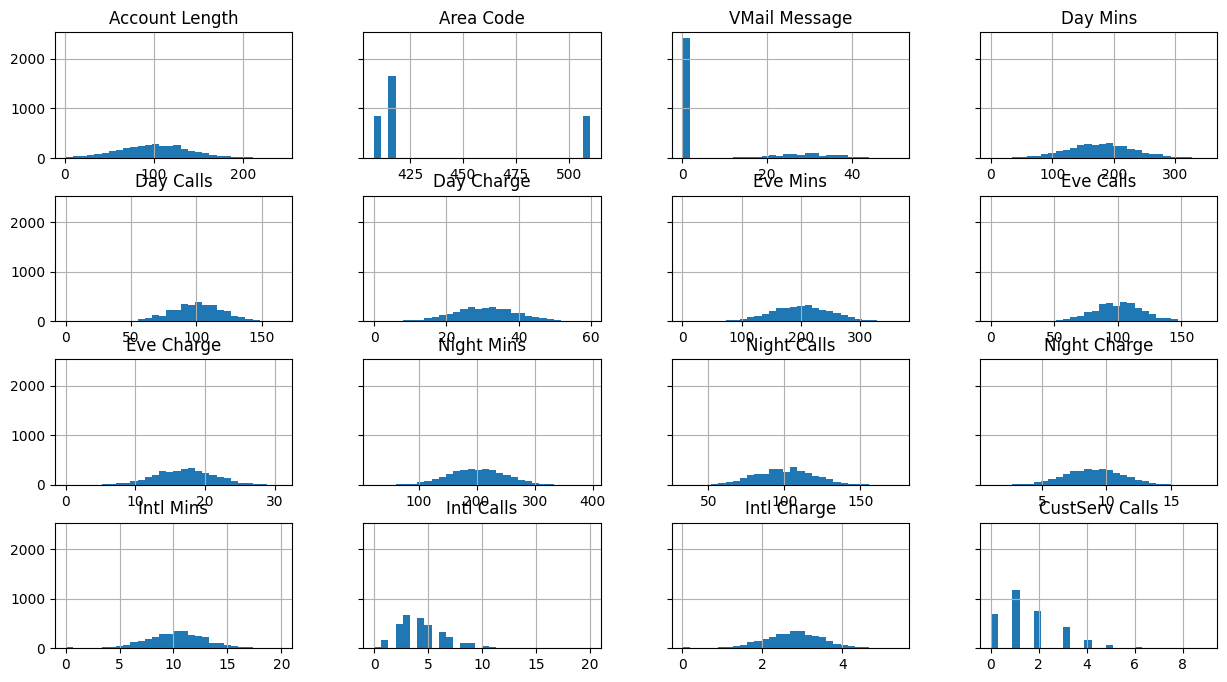

In [ ]:

%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(15, 8))


Plotting analysis:

- State appears to be quite evenly distributed
- Phone numbers are unique and their impact on any prediction is insignificant so we Will drop the feature.

- Most of the numeric features are correctly distributed, with many showing bell-like gaussianity.
- VMail Message being a notable exception.
- Area Code showing up as a feature we should convert to non-numeric.

In [ ]:
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [ ]:
# Drop Phone  feature
df.drop('Phone', axis=1, inplace=True)

In [ ]:
# Change  feature type
df['Area Code'] = df['Area Code'].astype(object)
df['Area Code'].dtype
print(df['Area Code'].unique())

[415 408 510]


In [ ]:
df.sample(3)

State  Account Length Area Code Int'l Plan VMail Plan  VMail Message  \
205     MO              66       415         no        yes             36   
2201    NY             116       510         no         no              0   
1125    MT             111       408         no         no              0   

      Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
205      106.7         76       18.14     209.8         77       17.83   
2201      89.5        128       15.22     180.8        137       15.37   
1125     142.3         75       24.19     122.8        106       10.44   

      Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
205        190.4          117          8.57       12.1           2   
2201       193.1           94          8.69       14.0           3   
1125       229.5           94         10.33       12.8           9   

      Intl Charge  CustServ Calls  Churn?  
205          3.27               1  False.  
2201         3.78               2  False.  
1125         3.46               2  False.

In [ ]:
# Dsiaplay All features Except the Target
df.iloc[:,:-1].sample(3)

State  Account Length Area Code Int'l Plan VMail Plan  VMail Message  \
1455    MO             131       408         no         no              0   
2482    MT             157       408         no         no              0   
2369    NY             112       415         no         no              0   

      Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
1455     109.5         95       18.62     332.1         48       28.23   
2482     240.2         67       40.83     153.0         98       13.01   
2369     174.3        123       29.63     140.2        124       11.92   

      Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
1455       258.6          108         11.64        6.6           7   
2482       249.0           72         11.21       10.2           6   
2369       215.4           89          9.69        9.0           6   

      Intl Charge  CustServ Calls  
1455         1.78               1  
2482         2.75               2  
2369         2.43               4

In [ ]:
df.drop("Churn?" , axis=1).head()

State  Account Length Area Code Int'l Plan VMail Plan  VMail Message  \
0    KS             128       415         no        yes             25   
1    OH             107       415         no        yes             26   
2    NJ             137       415         no         no              0   
3    OH              84       408        yes         no              0   
4    OK              75       415        yes         no              0   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  
0               1  
1               1  
2               0  
3               2  
4               3

In [ ]:
df.iloc[:,:-1].columns
# Same command   : df.drop("Churn?", axis=1).columns

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')

In [ ]:
pd.crosstab(index=df['VMail Plan'], columns=df['Churn?']
              ,values=df['Intl Calls'],
              aggfunc="mean",
              normalize="index")

Churn?        False.     True.
VMail Plan                    
no          0.527754  0.472246
yes         0.492344  0.507656

In [ ]:
# Churn Distribution by feature
for col in df.iloc[:,:-1].columns:
    #if col != 'Churn?':
    display(pd.crosstab(index=df[col],
                        columns=df['Churn?'],
                        normalize="columns"))

Churn?    False.     True.
State                     
AK      0.017193  0.006211
AL      0.025263  0.016563
AR      0.015439  0.022774
AZ      0.021053  0.008282
CA      0.008772  0.018634
CO      0.020000  0.018634
CT      0.021754  0.024845
DC      0.017193  0.010352
DE      0.018246  0.018634
FL      0.019298  0.016563
GA      0.016140  0.016563
HI      0.017544  0.006211
IA      0.014386  0.006211
ID      0.022456  0.018634
IL      0.018596  0.010352
IN      0.021754  0.018634
KS      0.020000  0.026915
KY      0.017895  0.016563
LA      0.016491  0.008282
MA      0.018947  0.022774
MD      0.018596  0.035197
ME      0.017193  0.026915
MI      0.020000  0.033126
MN      0.024211  0.031056
MO      0.019649  0.014493
MS      0.017895  0.028986
MT      0.018947  0.028986
NC      0.020000  0.022774
ND      0.019649  0.012422
NE      0.019649  0.010352
NH      0.016491  0.018634
NJ      0.017544  0.037267
NM      0.019649  0.012422
NV      0.018246  0.028986
NY      0.023860  0.031056
OH      0.023860  0.020704
OK      0.018246  0.018634
OR      0.023509  0.022774
PA      0.012982  0.016563
RI      0.020702  0.012422
SC      0.016140  0.028986
SD      0.018246  0.016563
TN      0.016842  0.010352
TX      0.018947  0.037267
UT      0.021754  0.020704
VA      0.025263  0.010352
VT      0.022807  0.016563
WA      0.018246  0.028986
WI      0.024912  0.014493
WV      0.033684  0.020704
WY      0.023860  0.018634

Churn?            False.    True.
Account Length                   
1               0.002456  0.00207
2               0.000000  0.00207
3               0.001754  0.00000
4               0.000351  0.00000
5               0.000351  0.00000
...                  ...      ...
221             0.000351  0.00000
224             0.000351  0.00207
225             0.000351  0.00207
232             0.000351  0.00000
243             0.000351  0.00000

[212 rows x 2 columns]

Churn?       False.     True.
Area Code                    
408        0.251228  0.252588
415        0.497895  0.488613
510        0.250877  0.258799

Churn?        False.     True.
Int'l Plan                    
no          0.934737  0.716356
yes         0.065263  0.283644

Churn?        False.     True.
VMail Plan                    
no          0.704561  0.834369
yes         0.295439  0.165631

Churn?           False.     True.
VMail Message                    
0              0.704561  0.834369
4              0.000351  0.000000
8              0.000702  0.000000
9              0.000702  0.000000
10             0.000351  0.000000
11             0.000702  0.000000
12             0.002105  0.000000
13             0.001404  0.000000
14             0.002456  0.000000
15             0.002807  0.002070
16             0.004211  0.002070
17             0.004561  0.002070
18             0.001754  0.004141
19             0.006316  0.002070
20             0.007018  0.004141
21             0.009123  0.004141
22             0.010526  0.004141
23             0.012632  0.000000
24             0.014386  0.002070
25             0.012982  0.000000
26             0.012281  0.012422
27             0.014386  0.006211
28             0.015789  0.012422
29             0.015789  0.016563
30             0.014737  0.004141
31             0.019298  0.010352
32             0.012281  0.012422
33             0.014035  0.012422
34             0.009474  0.004141
35             0.009825  0.008282
36             0.010526  0.008282
37             0.009474  0.004141
38             0.008421  0.002070
39             0.010526  0.000000
40             0.005263  0.002070
41             0.003509  0.006211
42             0.003860  0.008282
43             0.003158  0.000000
44             0.001754  0.004141
45             0.001754  0.002070
46             0.001404  0.000000
47             0.001053  0.000000
48             0.000351  0.002070
49             0.000351  0.000000
50             0.000702  0.000000
51             0.000351  0.000000

Churn?      False.    True.
Day Mins                   
0.0       0.000351  0.00207
2.6       0.000351  0.00000
7.8       0.000351  0.00000
7.9       0.000351  0.00000
12.5      0.000351  0.00000
...            ...      ...
335.5     0.000000  0.00207
337.4     0.000000  0.00207
345.3     0.000000  0.00207
346.8     0.000000  0.00207
350.8     0.000000  0.00207

[1667 rows x 2 columns]

Churn?       False.    True.
Day Calls                   
0          0.000351  0.00207
30         0.000351  0.00000
35         0.000351  0.00000
36         0.000351  0.00000
40         0.000702  0.00000
...             ...      ...
157        0.000351  0.00000
158        0.001053  0.00000
160        0.000351  0.00000
163        0.000351  0.00000
165        0.000000  0.00207

[119 rows x 2 columns]

Churn?        False.    True.
Day Charge                   
0.00        0.000351  0.00207
0.44        0.000351  0.00000
1.33        0.000351  0.00000
1.34        0.000351  0.00000
2.13        0.000351  0.00000
...              ...      ...
57.04       0.000000  0.00207
57.36       0.000000  0.00207
58.70       0.000000  0.00207
58.96       0.000000  0.00207
59.64       0.000000  0.00207

[1667 rows x 2 columns]

Churn?      False.    True.
Eve Mins                   
0.0       0.000351  0.00000
31.2      0.000351  0.00000
42.2      0.000351  0.00000
42.5      0.000351  0.00000
43.9      0.000351  0.00000
...            ...      ...
350.9     0.000000  0.00207
351.6     0.000351  0.00000
354.2     0.000351  0.00000
361.8     0.000351  0.00000
363.7     0.000000  0.00207

[1611 rows x 2 columns]

Churn?       False.    True.
Eve Calls                   
0          0.000351  0.00000
12         0.000351  0.00000
36         0.000351  0.00000
37         0.000351  0.00000
42         0.000351  0.00000
...             ...      ...
157        0.000351  0.00000
159        0.000000  0.00207
164        0.000351  0.00000
168        0.000000  0.00207
170        0.000351  0.00000

[123 rows x 2 columns]

Churn?        False.    True.
Eve Charge                   
0.00        0.000351  0.00000
2.65        0.000351  0.00000
3.59        0.000351  0.00000
3.61        0.000351  0.00000
3.73        0.000351  0.00000
...              ...      ...
29.83       0.000000  0.00207
29.89       0.000351  0.00000
30.11       0.000351  0.00000
30.75       0.000351  0.00000
30.91       0.000000  0.00207

[1440 rows x 2 columns]

Churn?        False.    True.
Night Mins                   
23.2        0.000351  0.00000
43.7        0.000351  0.00000
45.0        0.000351  0.00000
47.4        0.000000  0.00207
50.1        0.000702  0.00000
...              ...      ...
364.9       0.000351  0.00000
367.7       0.000351  0.00000
377.5       0.000351  0.00000
381.9       0.000351  0.00000
395.0       0.000351  0.00000

[1591 rows x 2 columns]

Churn?         False.    True.
Night Calls                   
33           0.000351  0.00000
36           0.000351  0.00000
38           0.000351  0.00000
42           0.000702  0.00000
44           0.000351  0.00000
...               ...      ...
157          0.000702  0.00000
158          0.000000  0.00207
164          0.000351  0.00000
166          0.000351  0.00000
175          0.000351  0.00000

[120 rows x 2 columns]

Churn?          False.    True.
Night Charge                   
1.04          0.000351  0.00000
1.97          0.000351  0.00000
2.03          0.000351  0.00000
2.13          0.000000  0.00207
2.25          0.000702  0.00000
...                ...      ...
16.42         0.000351  0.00000
16.55         0.000351  0.00000
16.99         0.000351  0.00000
17.19         0.000351  0.00000
17.77         0.000351  0.00000

[933 rows x 2 columns]

Churn?       False.    True.
Intl Mins                   
0.0        0.006316  0.00000
1.1        0.000351  0.00000
1.3        0.000351  0.00000
2.0        0.000351  0.00207
2.1        0.000702  0.00000
...             ...      ...
18.2       0.000702  0.00000
18.3       0.000000  0.00207
18.4       0.000351  0.00000
18.9       0.000351  0.00000
20.0       0.000000  0.00207

[162 rows x 2 columns]

Churn?        False.     True.
Intl Calls                    
0           0.006316  0.000000
1           0.045263  0.064182
2           0.133684  0.223602
3           0.200000  0.202899
4           0.189474  0.163561
5           0.147018  0.109731
6           0.102807  0.089027
7           0.067018  0.055901
8           0.036842  0.022774
9           0.033333  0.028986
10          0.014737  0.016563
11          0.008421  0.008282
12          0.004912  0.002070
13          0.004561  0.002070
14          0.001754  0.002070
15          0.001404  0.006211
16          0.000702  0.000000
17          0.000351  0.000000
18          0.001053  0.000000
19          0.000351  0.000000
20          0.000000  0.002070

Churn?         False.    True.
Intl Charge                   
0.00         0.006316  0.00000
0.30         0.000351  0.00000
0.35         0.000351  0.00000
0.54         0.000351  0.00207
0.57         0.000702  0.00000
...               ...      ...
4.91         0.000702  0.00000
4.94         0.000000  0.00207
4.97         0.000351  0.00000
5.10         0.000351  0.00000
5.40         0.000000  0.00207

[162 rows x 2 columns]

Churn?            False.     True.
CustServ Calls                    
0               0.212281  0.190476
1               0.371579  0.252588
2               0.235789  0.180124
3               0.135088  0.091097
4               0.031579  0.157350
5               0.009123  0.082816
6               0.002807  0.028986
7               0.001404  0.010352
8               0.000351  0.002070
9               0.000000  0.004141

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   object 
 3   Int'l Plan      3333 non-null   object 
 4   VMail Plan      3333 non-null   object 
 5   VMail Message   3333 non-null   int64  
 6   Day Mins        3333 non-null   float64
 7   Day Calls       3333 non-null   int64  
 8   Day Charge      3333 non-null   float64
 9   Eve Mins        3333 non-null   float64
 10  Eve Calls       3333 non-null   int64  
 11  Eve Charge      3333 non-null   float64
 12  Night Mins      3333 non-null   float64
 13  Night Calls     3333 non-null   int64  
 14  Night Charge    3333 non-null   float64
 15  Intl Mins       3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [ ]:
df.select_dtypes('number').columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

Account Length


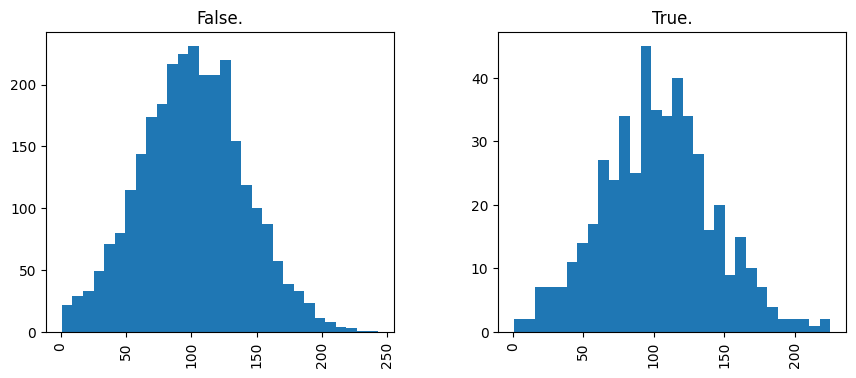

VMail Message


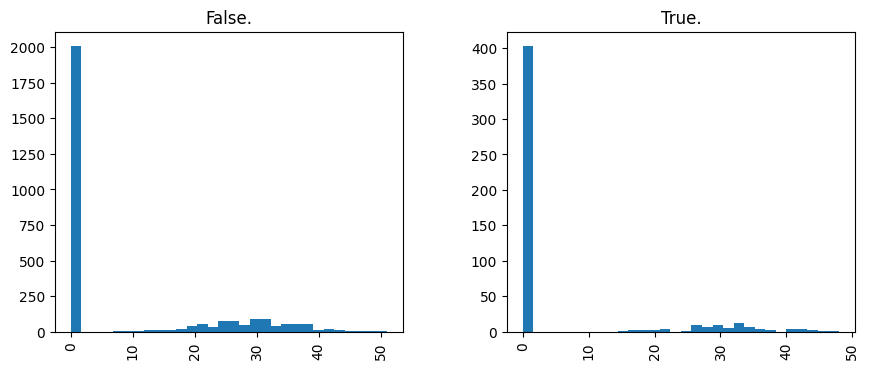

Day Mins


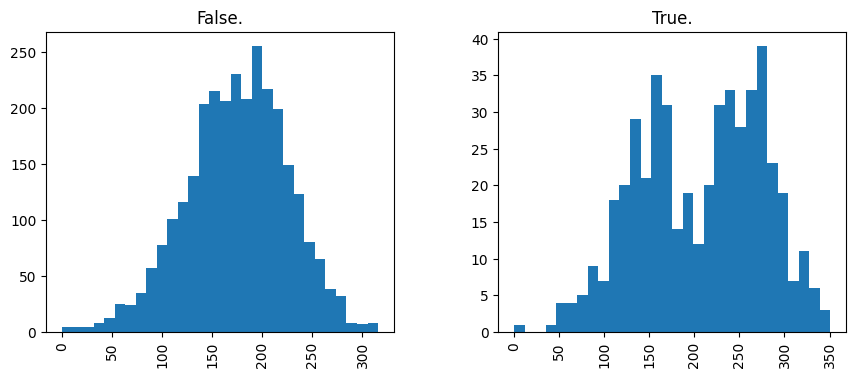

Day Calls


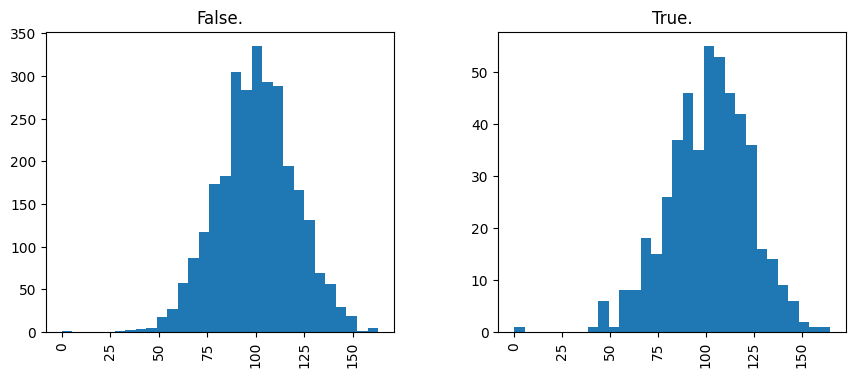

Day Charge


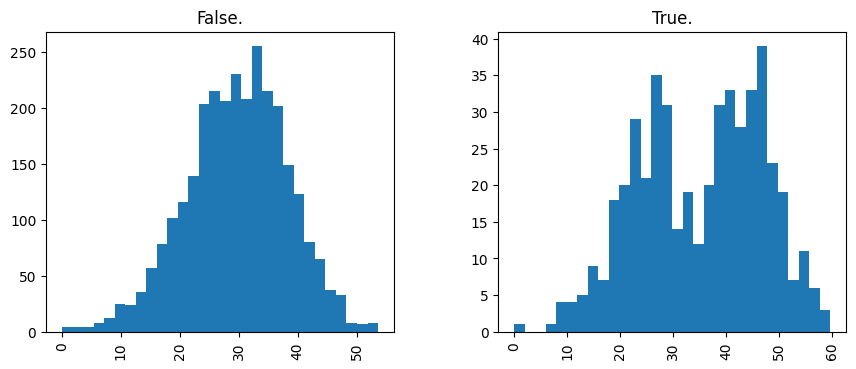

Eve Mins


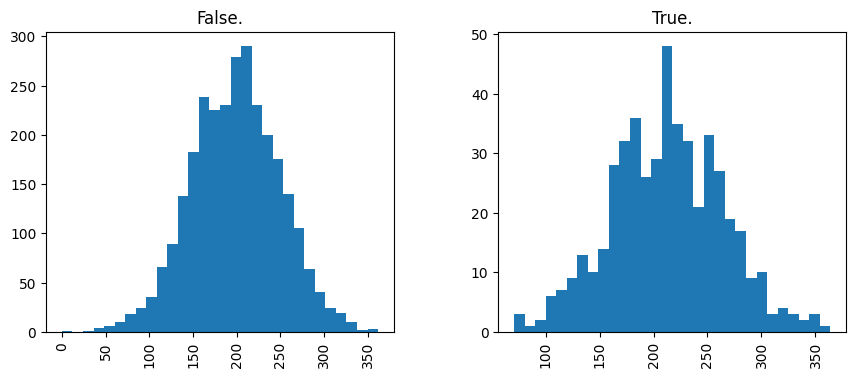

Eve Calls


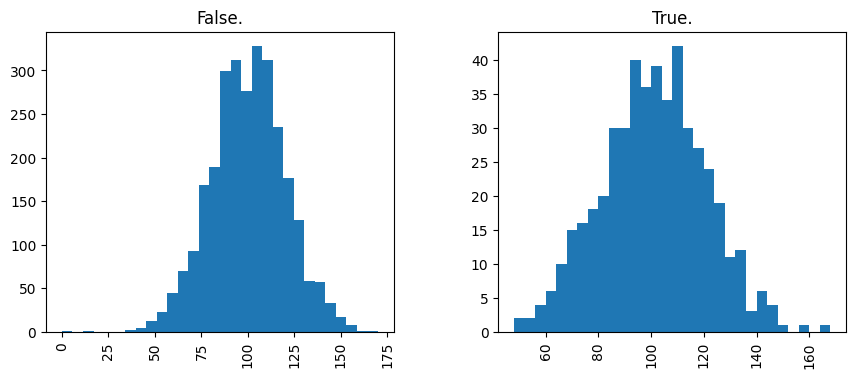

Eve Charge


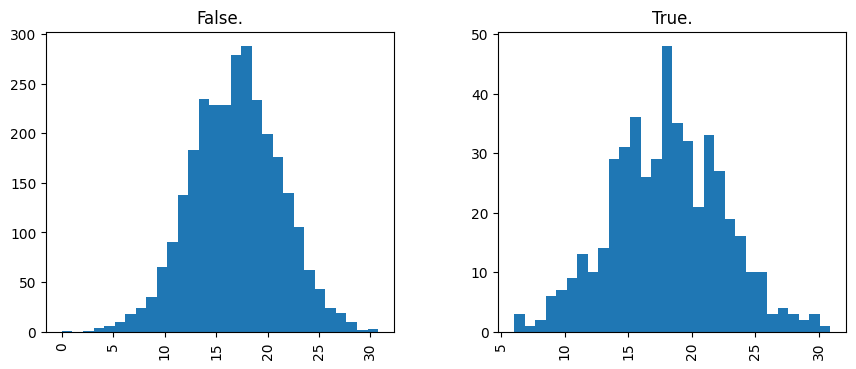

Night Mins


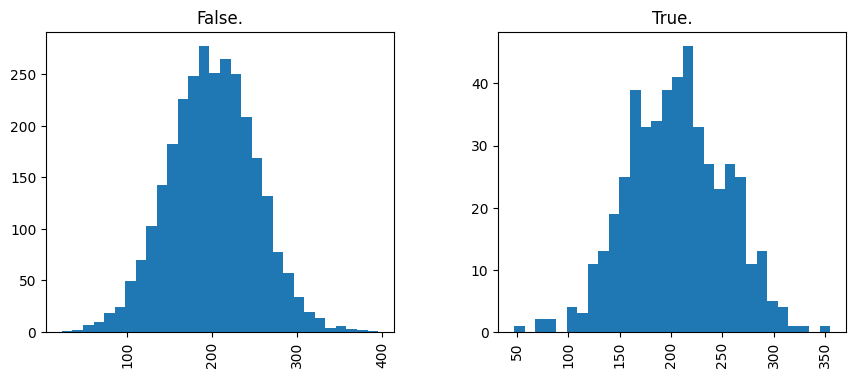

Night Calls


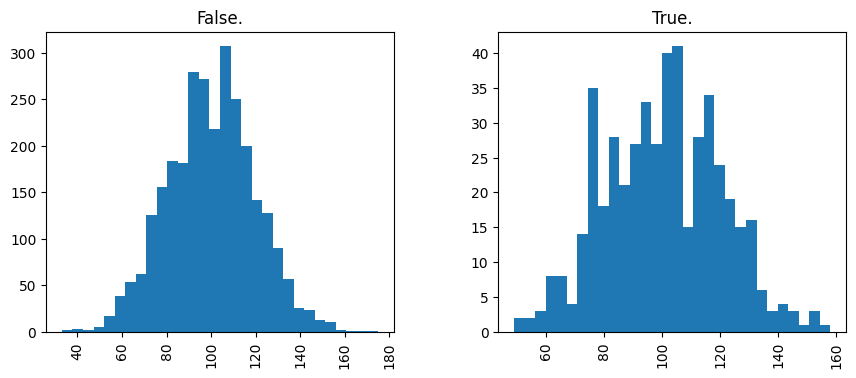

Night Charge


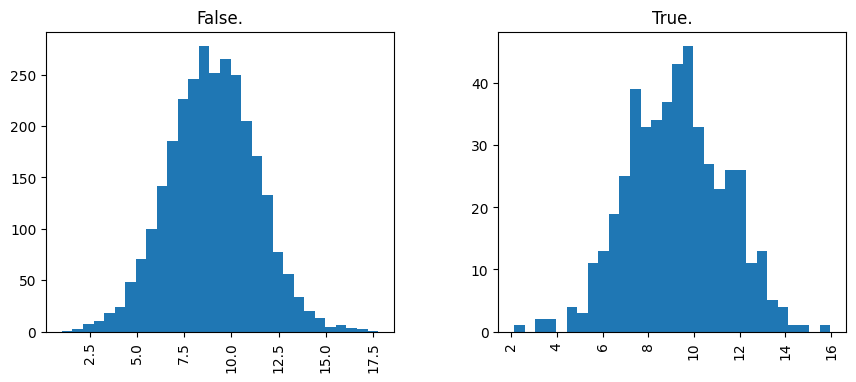

Intl Mins


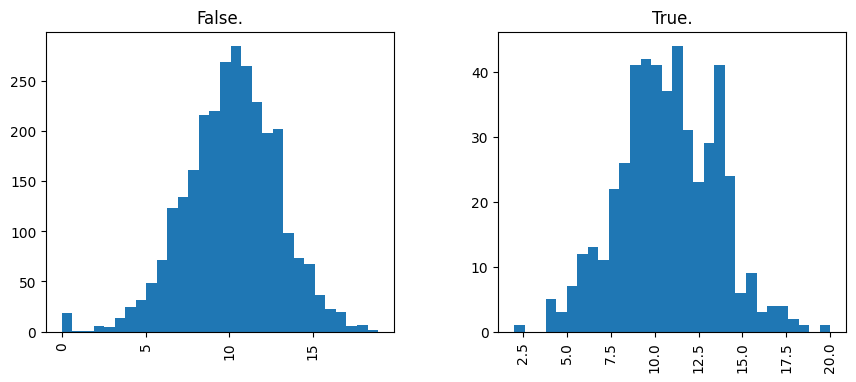

Intl Calls


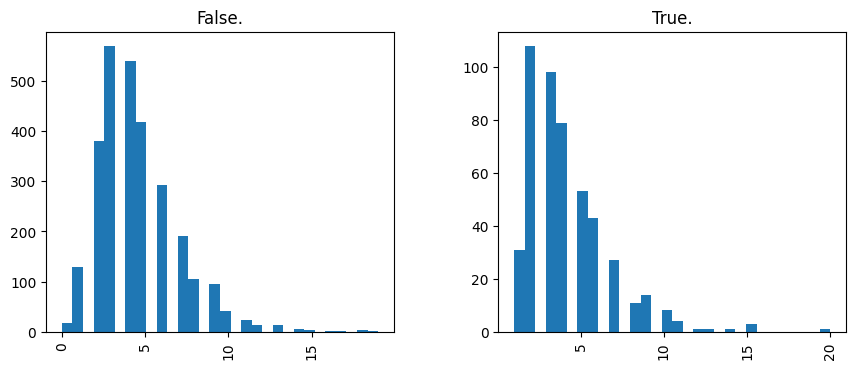

Intl Charge


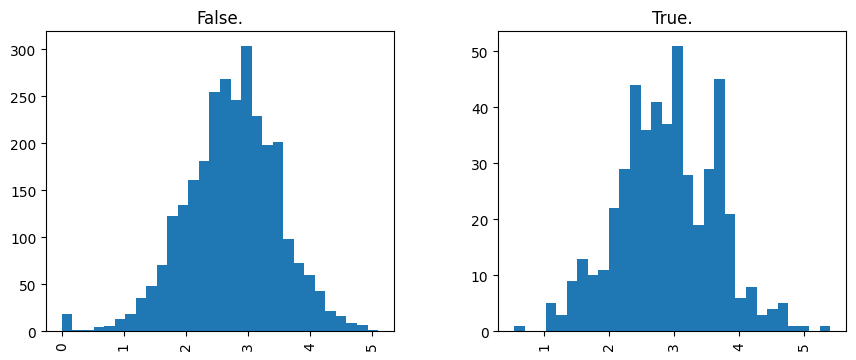

CustServ Calls


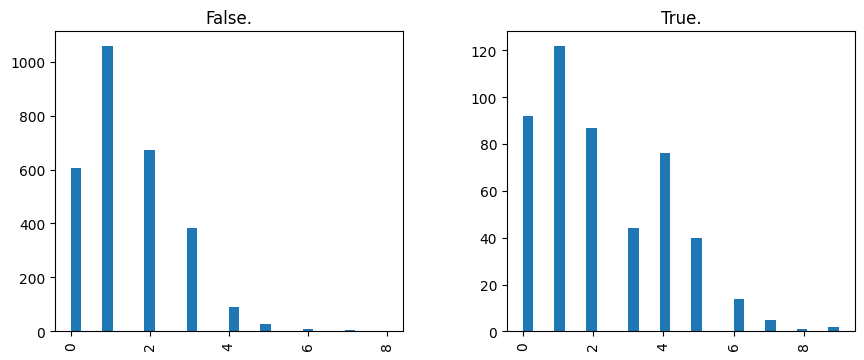

In [ ]:
#  Churn Plotting by Numeric features
import matplotlib.pyplot as plt

for col in df.select_dtypes('number').columns:
    print(col)
    hist = df[[col, 'Churn?']].hist(by='Churn?', bins=30, figsize=(10, 4) )
    plt.show()

In [ ]:
ls

 Car_Drive/      Churn_2.ipynb   Data/         imgs/
 Churn_1.ipynb   Churn_3.ipynb  'Data sets'/   ML.gslides


In [ ]:
#  Dataset Saving
df.to_csv('./Data/churn_1.csv')



---



---



In [ ]:
df.sample(4)

State  Account Length Area Code Int'l Plan VMail Plan  VMail Message  \
3147    NM              62       415         no         no              0   
1725    MN              99       408         no         no              0   
1382    GA             125       415         no        yes             39   
1768    MN             115       510        yes         no              0   

      Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
3147     245.3         91       41.70     122.9        130       10.45   
1725     128.8         86       21.90     203.9        105       17.33   
1382     236.1        107       40.14     289.2        110       24.58   
1768     122.0        110       20.74     220.2        100       18.72   

      Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
3147       228.4          102         10.28        8.5           4   
1725       282.6          131         12.72       14.1           4   
1382       175.4          107          7.89        9.1           4   
1768       179.7          124          8.09       10.8           2   

      Intl Charge  CustServ Calls  Churn?  
3147         2.30               4  False.  
1725         3.81               2  False.  
1382         2.46               2  False.  
1768         2.92               2   True.

### $\large \text{Correlation Table}$

In [ ]:
df.select_dtypes(exclude="object").corr()

Account Length  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000      -0.004628  0.006216   0.038470   
VMail Message        -0.004628       1.000000  0.000778  -0.009548   
Day Mins              0.006216       0.000778  1.000000   0.006750   
Day Calls             0.038470      -0.009548  0.006750   1.000000   
Day Charge            0.006214       0.000776  1.000000   0.006753   
Eve Mins             -0.006757       0.017562  0.007043  -0.021451   
Eve Calls             0.019260      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745       0.017578  0.007029  -0.021449   
Night Mins           -0.008955       0.007681  0.004323   0.022938   
Night Calls          -0.013176       0.007123  0.022972  -0.019557   
Night Charge         -0.008960       0.007663  0.004300   0.022927   
Intl Mins             0.009514       0.002856 -0.010155   0.021565   
Intl Calls            0.020661       0.013957  0.008033   0.004574   
Intl Charge           0.009546       0.002884 -0.010092   0.021666   
CustServ Calls       -0.003796      -0.013263 -0.013423  -0.018942   

                Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
Account Length    0.006214 -0.006757   0.019260   -0.006745   -0.008955   
VMail Message     0.000776  0.017562  -0.005864    0.017578    0.007681   
Day Mins          1.000000  0.007043   0.015769    0.007029    0.004323   
Day Calls         0.006753 -0.021451   0.006462   -0.021449    0.022938   
Day Charge        1.000000  0.007050   0.015769    0.007036    0.004324   
Eve Mins          0.007050  1.000000  -0.011430    1.000000   -0.012584   
Eve Calls         0.015769 -0.011430   1.000000   -0.011423   -0.002093   
Eve Charge        0.007036  1.000000  -0.011423    1.000000   -0.012592   
Night Mins        0.004324 -0.012584  -0.002093   -0.012592    1.000000   
Night Calls       0.022972  0.007586   0.007710    0.007596    0.011204   
Night Charge      0.004301 -0.012593  -0.002056   -0.012601    0.999999   
Intl Mins        -0.010157 -0.011035   0.008703   -0.011043   -0.015207   
Intl Calls        0.008032  0.002541   0.017434    0.002541   -0.012353   
Intl Charge      -0.010094 -0.011067   0.008674   -0.011074   -0.015180   
CustServ Calls   -0.013427 -0.012985   0.002423   -0.012987   -0.009288   

                Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
Account Length    -0.013176     -0.008960   0.009514    0.020661     0.009546   
VMail Message      0.007123      0.007663   0.002856    0.013957     0.002884   
Day Mins           0.022972      0.004300  -0.010155    0.008033    -0.010092   
Day Calls         -0.019557      0.022927   0.021565    0.004574     0.021666   
Day Charge         0.022972      0.004301  -0.010157    0.008032    -0.010094   
Eve Mins           0.007586     -0.012593  -0.011035    0.002541    -0.011067   
Eve Calls          0.007710     -0.002056   0.008703    0.017434     0.008674   
Eve Charge         0.007596     -0.012601  -0.011043    0.002541    -0.011074   
Night Mins         0.011204      0.999999  -0.015207   -0.012353    -0.015180   
Night Calls        1.000000      0.011188  -0.013605    0.000305    -0.013630   
Night Charge       0.011188      1.000000  -0.015214   -0.012329    -0.015186   
Intl Mins         -0.013605     -0.015214   1.000000    0.032304     0.999993   
Intl Calls         0.000305     -0.012329   0.032304    1.000000     0.032372   
Intl Charge       -0.013630     -0.015186   0.999993    0.032372     1.000000   
CustServ Calls    -0.012802     -0.009277  -0.009640   -0.017561    -0.009675   

                CustServ Calls  
Account Length       -0.003796  
VMail Message        -0.013263  
Day Mins             -0.013423  
Day Calls            -0.018942  
Day Charge           -0.013427  
Eve Mins             -0.012985  
Eve Calls             0.002423  
Eve Charge           -0.012987  
Night Mins           -0.009288  
Night Calls          -0.012802  
Night Charge         -0.009277  
I

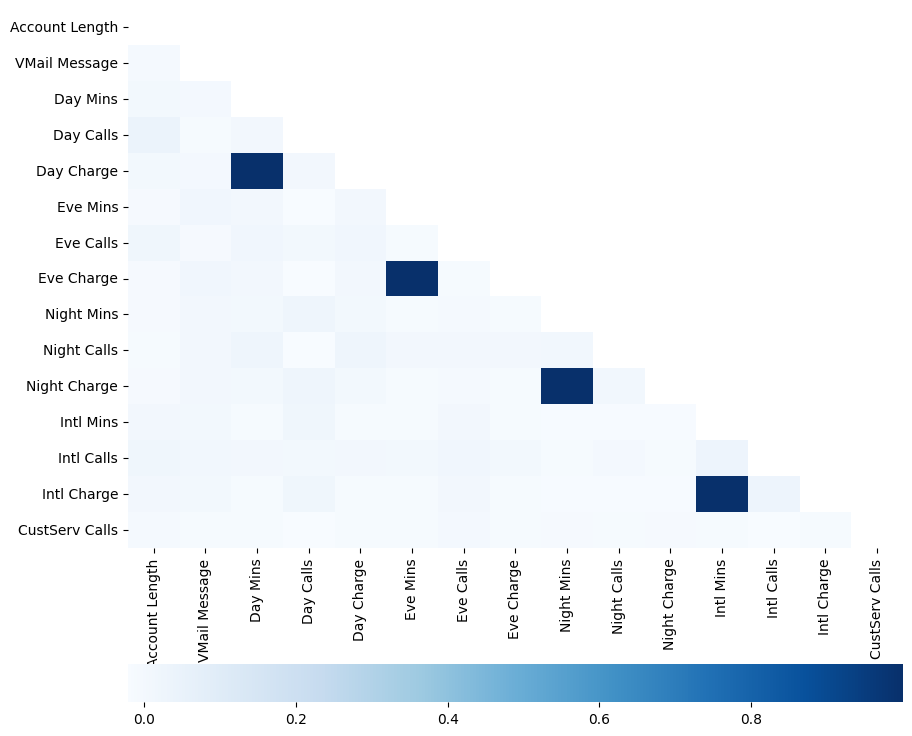

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df_cor=df.select_dtypes(exclude="object").corr()

matrix=np.triu(df_cor)
_=sns.heatmap(df_cor, mask=matrix,  cbar_kws={"orientation": "horizontal"},  cmap="Blues")

- We can Notice the high Correlation between Night Mins with Night Charge, Day Mins with Day Charge, Int Mins with Int Charge and Eve Mins with Eve Charge.  Let's get a scatter plot for all Numerical  Features

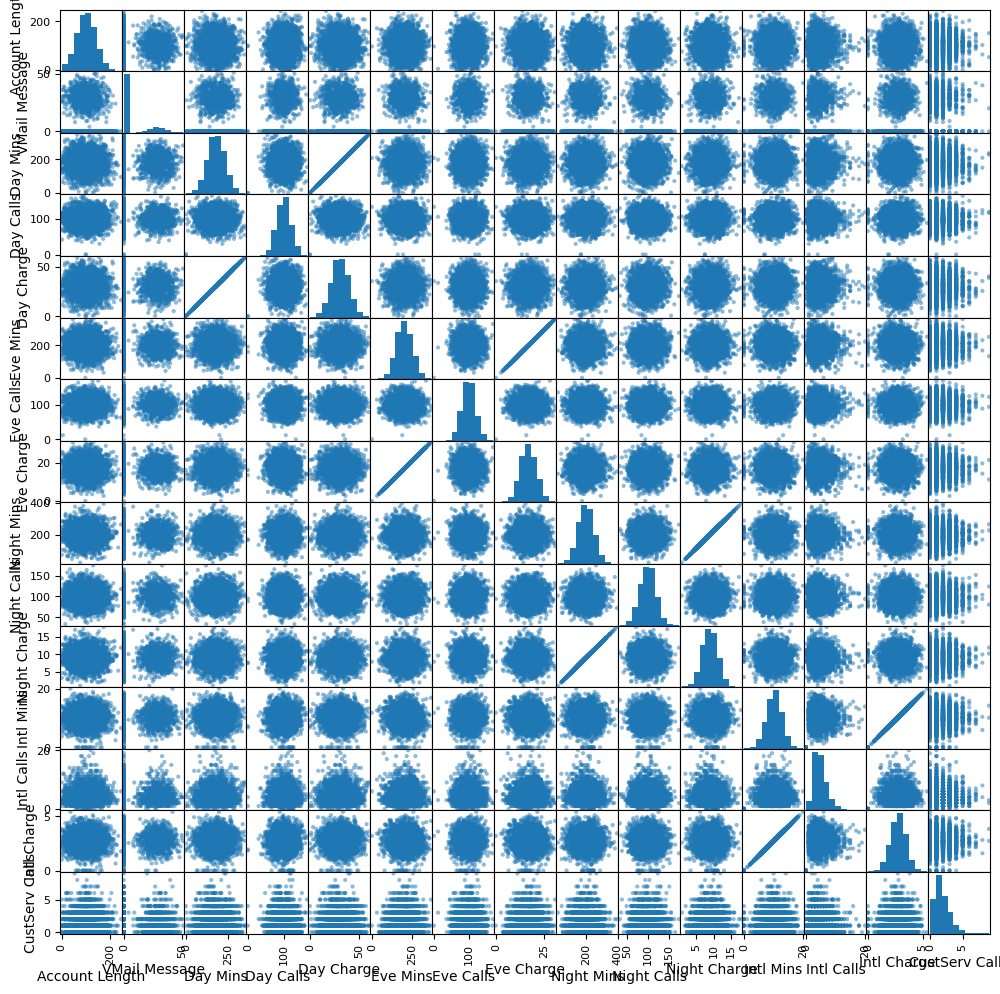

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()


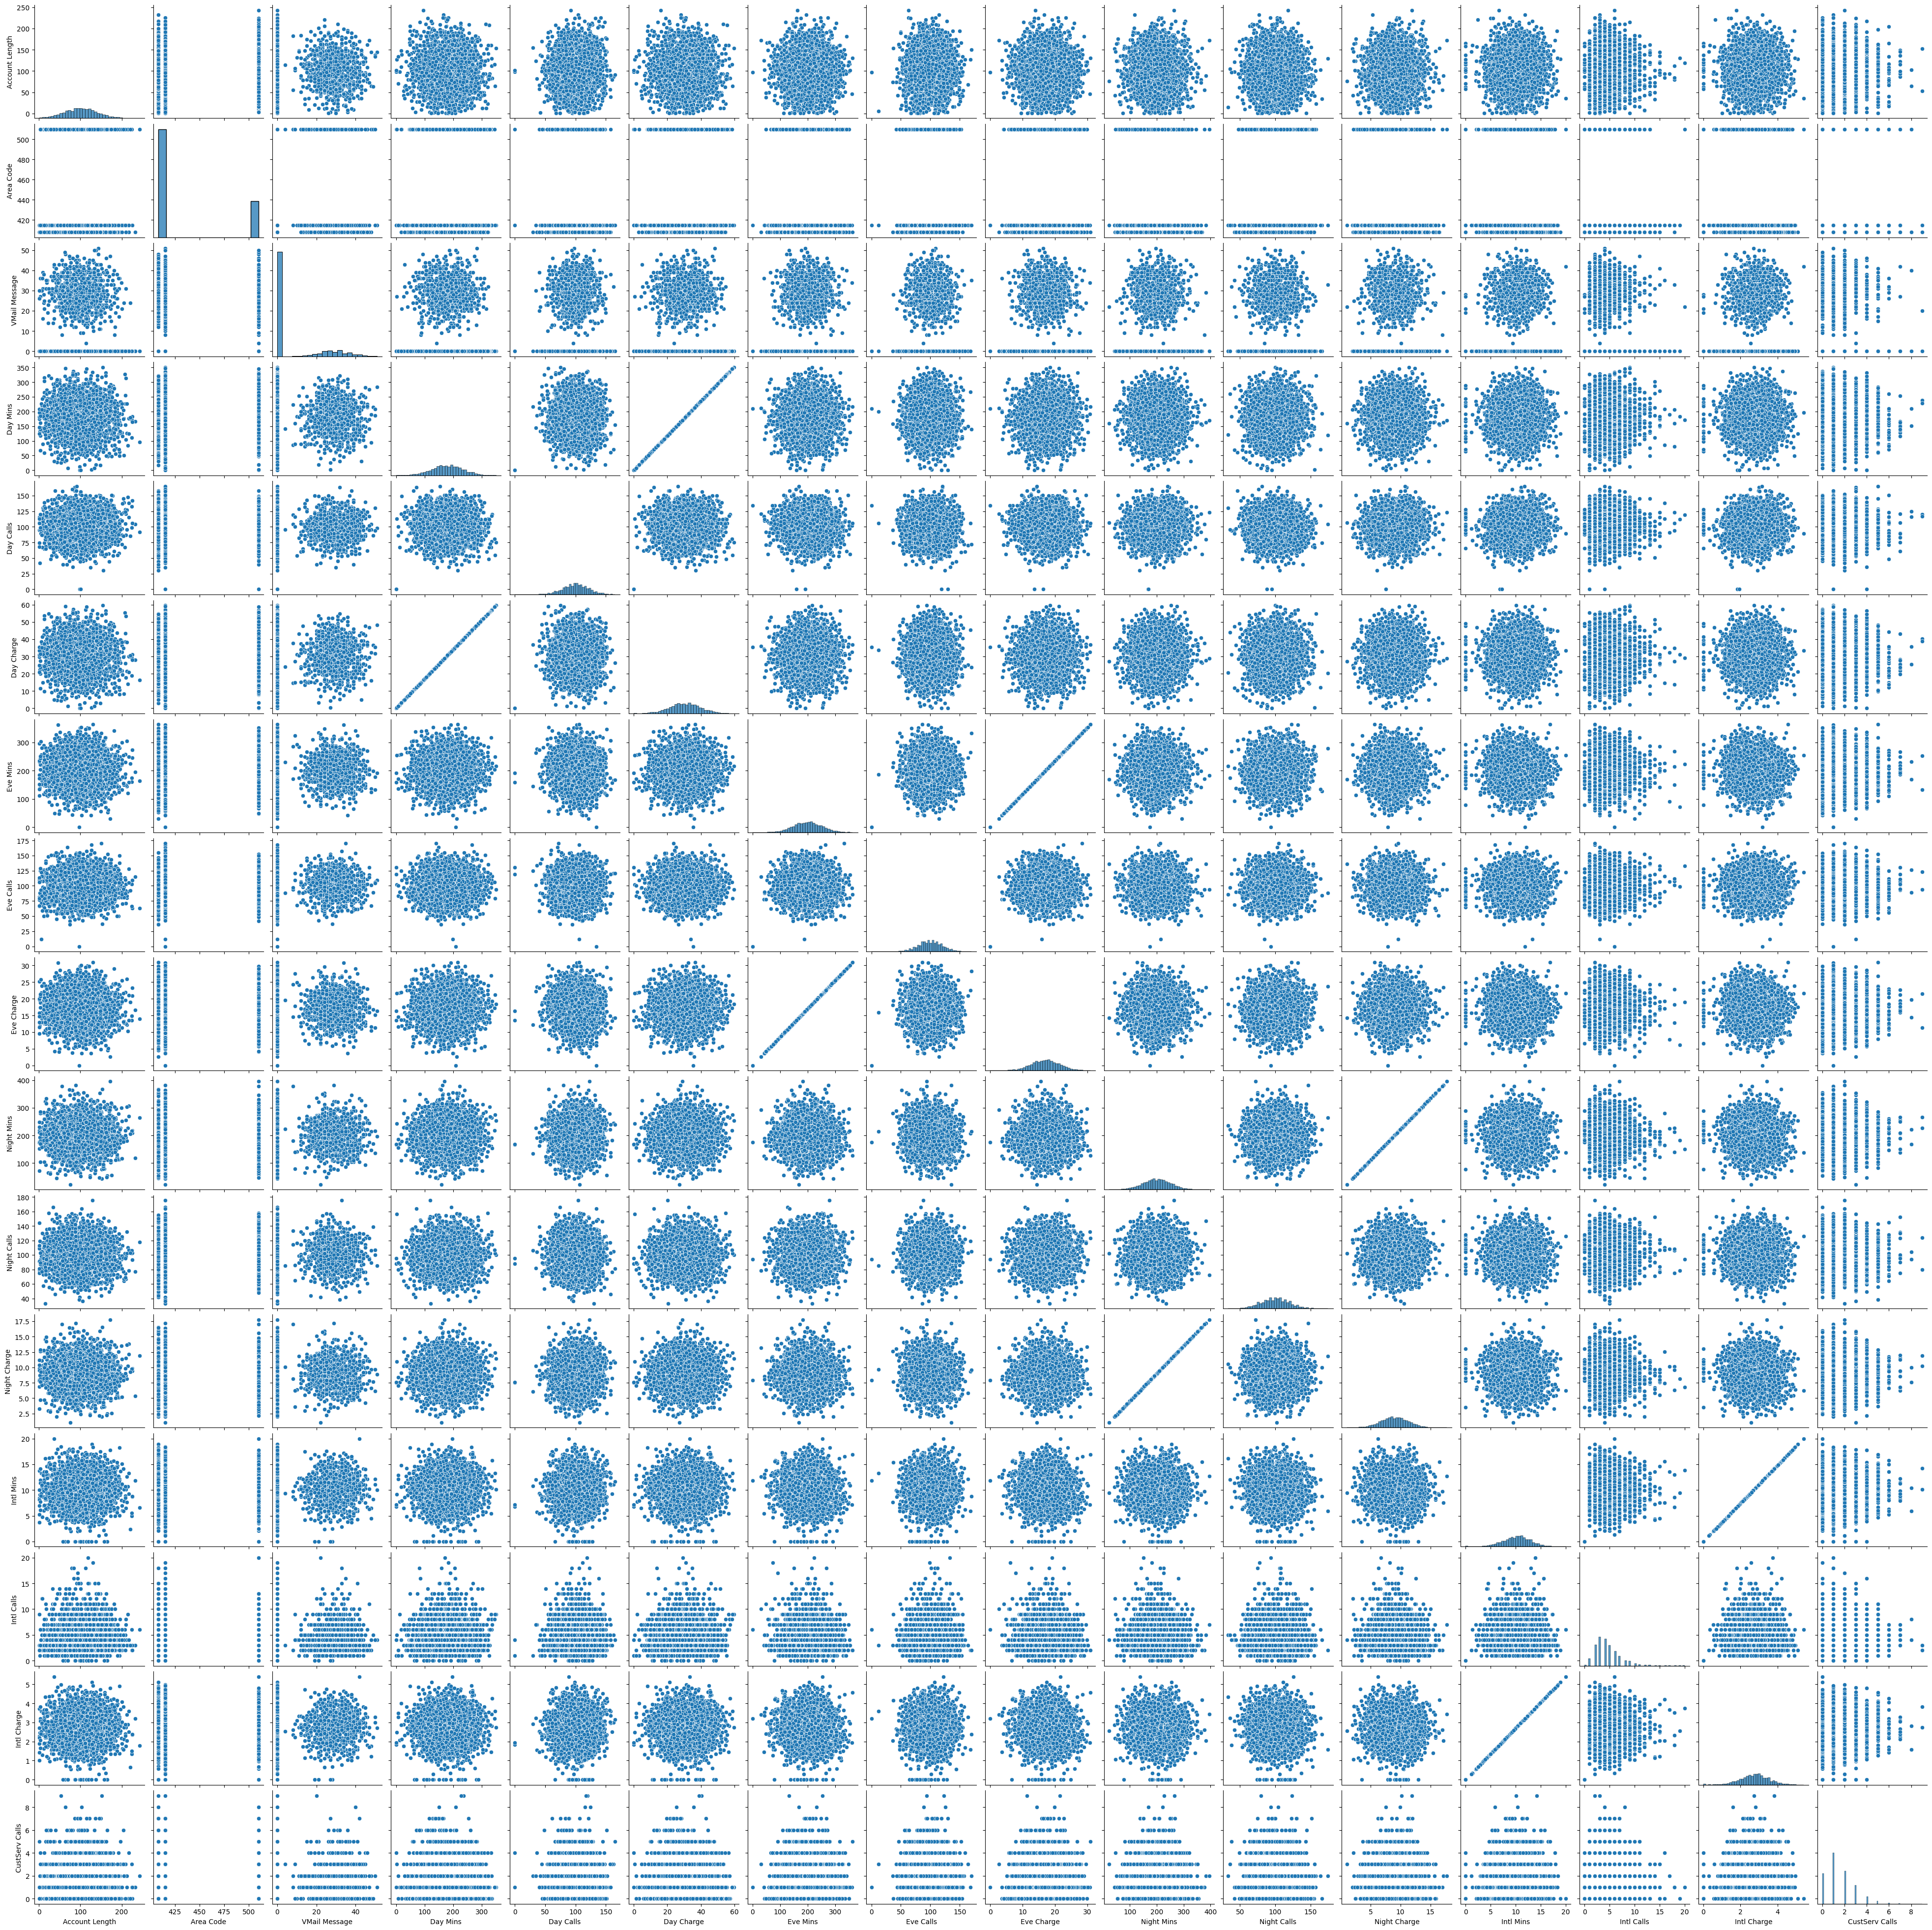

In [ ]:
_=sns.pairplot(df)

### $\large \text{Data Cleaning} $

In [ ]:
#  Get rid of all highly correlated features
df.drop(['Day Charge',
         'Eve Charge', 'Night Charge', 'Intl Charge'],
        axis=1, inplace=True)

In [ ]:
df.head()

State  Account Length Area Code Int'l Plan VMail Plan  VMail Message  \
0    KS             128       415         no        yes             25   
1    OH             107       415         no        yes             26   
2    NJ             137       415         no         no              0   
3    OH              84       408        yes         no              0   
4    OK              75       415        yes         no              0   

   Day Mins  Day Calls  Eve Mins  Eve Calls  Night Mins  Night Calls  \
0     265.1        110     197.4         99       244.7           91   
1     161.6        123     195.5        103       254.4          103   
2     243.4        114     121.2        110       162.6          104   
3     299.4         71      61.9         88       196.9           89   
4     166.7        113     148.3        122       186.9          121   

   Intl Mins  Intl Calls  CustServ Calls  Churn?  
0       10.0           3               1  False.  
1       13.7           3               1  False.  
2       12.2           5               0  False.  
3        6.6           7               2  False.  
4       10.1           3               3  False.

In [ ]:
df.shape

(3333, 16)

### $\large \text {Data Encoding}$

In [ ]:
# Display Dataset features
df.keys()

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [ ]:
# Display Dataset Feature types
df.dtypes

State              object
Account Length      int64
Area Code          object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Eve Mins          float64
Eve Calls           int64
Night Mins        float64
Night Calls         int64
Intl Mins         float64
Intl Calls          int64
CustServ Calls      int64
Churn?             object
dtype: object

In [ ]:
# Numeric features  data display
df.select_dtypes("object").head()

State Area Code Int'l Plan VMail Plan  Churn?
0    KS       415         no        yes  False.
1    OH       415         no        yes  False.
2    NJ       415         no         no  False.
3    OH       408        yes         no  False.
4    OK       415        yes         no  False.

In [ ]:
df["Churn?"].unique()

NameError: name 'df' is not defined

In [ ]:
#  Churn Proportion
df["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [ ]:
# Target   Encoding
df["Churn?"]=np.where(df["Churn?"].str.contains("F"), 0, 1)
# df["Churn?"]=((df["Churn?"]=="True.")+0) #.value_counts()


In [ ]:
#  Target  values Repartition
df["Churn?"].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [ ]:
df["Churn?"].unique()

array([0, 1])

In [ ]:
for col in df.select_dtypes("object").columns:
  df[col]=df[col].astype("category")

In [ ]:
df.select_dtypes("category").columns

Index(['State', 'Area Code', 'Int'l Plan', 'VMail Plan'], dtype='object')

##  $$\Large \text {DataSet Training }$$
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>


In [ ]:
#  Feature &  Target    datasets
X=df.drop("Churn?", axis=1)  # features
y=df["Churn?"]  # Target

In [ ]:
X.head()

State  Account Length Area Code  ... Intl Mins Intl Calls  CustServ Calls
0    KS             128       415  ...      10.0          3               1
1    OH             107       415  ...      13.7          3               1
2    NJ             137       415  ...      12.2          5               0
3    OH              84       408  ...       6.6          7               2
4    OK              75       415  ...      10.1          3               3

[5 rows x 15 columns]

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [ ]:
#  Splitting Features to  training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=0.2, random_state=42)

In [ ]:
X_train.shape[0]/X.shape[0]

0.7998799879987999

In [ ]:
X_train.keys()

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls'],
      dtype='object')

In [ ]:
pd.get_dummies(df[['Area Code' ,"VMail Plan"]]) #, prefix=["state", "Vmail"])

Area Code_408  Area Code_415  ...  VMail Plan_no  VMail Plan_yes
0                 0              1  ...              0               1
1                 0              1  ...              0               1
2                 0              1  ...              1               0
3                 1              0  ...              1               0
4                 0              1  ...              1               0
...             ...            ...  ...            ...             ...
3328              0              1  ...              0               1
3329              0              1  ...              1               0
3330              0              0  ...              1               0
3331              0              0  ...              1               0
3332              0              1  ...              0               1

[3333 rows x 5 columns]

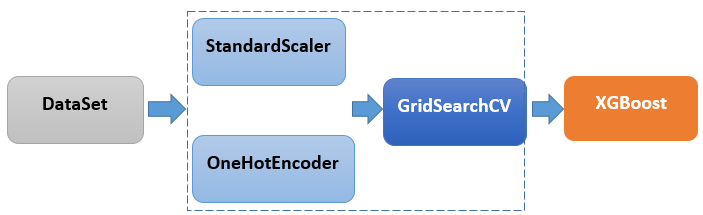

In [ ]:
# Put Features Dataset within a Pipeline and depict each process for each set of features
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import make_pipeline



num_pipeline= make_pipeline(
     StandardScaler()    # Rescaling
)

cat_pipeline= make_pipeline(
     OneHotEncoder(drop="if_binary", sparse=False)  # Categorical features to be Encoded. We'r dropping one feature for every binary ones.
)


In [ ]:
#  Pipeline structure
from sklearn.compose import make_column_transformer , make_column_selector  as selector

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number")) , # Categorical features Encoding
     remainder="passthrough"  # Drop all features left.
     )


In [ ]:
# pipeline Matrix Size
preprocess.fit_transform(X_train).shape

(2666, 67)

In [ ]:
# Dataset Transformation
preprocess.fit_transform(X_train)[1]

array([ 0.18495105, -0.58493553, -1.24401372,  0.22417614, -0.13808167,
        0.49986368,  0.16508987, -0.35370363, -2.19479326, -0.18437035,
        1.81351945,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ])

### $\large  \text{XGBoost : XGBClassifier} $
<img src="https://miro.medium.com/max/1000/0*tzKt_ABz5rRrsGoW.jpg" width=600></img>


In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # Pipiline Processing
    PCA( ),  #   Dimension Reduction

    XGBClassifier()  # Gradient Boosting Algorithm
)

- *Dimensionality reduction is learning technique that reduces the number of features and, at the same time, retains as much information as possible. It is usually performed by obtaining a set of new principal features.*

In [ ]:
#pipeline parameters
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__d

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
[i/10.0 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
# Hyper-parameters
param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150,],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75],  #for unbalanced target values

    'pca__n_components':[30, 40, 50]  # to get rid off late with 5_randomizedseach_churn

}

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg">

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/Precision-Recall_tradeoff.png" width=500>




---



![](https://adventuresindatascience.files.wordpress.com/2017/10/bb_rcv.png)

### GridSearchCV

In [ ]:
# %%time
from sklearn.model_selection import  GridSearchCV
gridSearch = GridSearchCV(pipe_XGBCl, param_grid, scoring=scorers, refit='roc_auc',cv=kf,   n_jobs=-1 , return_train_score=True, verbose=3)

In [ ]:
# Training  Dataset
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c3fa5f83b50>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('on...
                         'xgbclassifier__max_depth': range(3, 5),
                         'xgbclassifier__n_estimators': [50, 100, 150],
                         'xgbclassifier__scale_pos_weight': [1, 10, 25, 50,
                                                             75]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)},
             verbose=3)

In [ ]:
# Disaply Score &  best paramters values
f"Best:  {gridSearch.best_score_} using  {gridSearch.best_params_}"

"Best:  0.7876546691155598 using  {'pca__n_components': 40, 'xgbclassifier__colsample_bytree': 0.2, 'xgbclassifier__gamma': 0.2, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10}"

In [ ]:
# Best parameters to Keep
gridSearch.best_params_

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.0,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 150,
 'xgbclassifier__scale_pos_weight': 10}

In [ ]:
#  Best Estimator
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8104ef610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8104ef710>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.0,
                               n_estimators=150, scale_pos_weight=10))])

In [ ]:
#  test training Score
f" Score {gridSearch.best_estimator_.score(X_test, y_test):.3}"


' Score 0.81'

In [ ]:
#  AUC  Score  for  X_train training  DataSet
y_pred_train= gridSearch.predict(X_train)
f"train dataset performance : {roc_auc_score(y_train, y_pred_train)} "

'train dataset performance : 0.8904248539807996 '

In [ ]:
#  AUC  Score  for  X_test testing  DataSet
y_pred_test= gridSearch.predict(X_test)
f"Test dataset Performance : {roc_auc_score(y_test, y_pred_test):0.3} "

'Test dataset Performance : 0.802 '

- When you observe high training accuracy, but low tests accuracy, it is likely
that you encounter overfitting problem.

In [ ]:
# prediction
y_pred=gridSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.81'

$$\Large  Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$$

In [ ]:
# Recall Score
f"Test Performance: {recall_score(y_test, gridSearch.predict(X_test)):0.3} "

'Test Performance: 0.792 '

In [ ]:
! pip install  scikit-plot

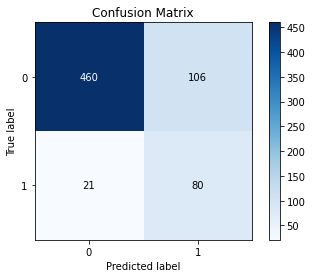

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

- Recall
recall determins the number of false negatives that were thrown into the prediction result.
$$ Recall = \frac{TP}{TP + FN}$$

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)

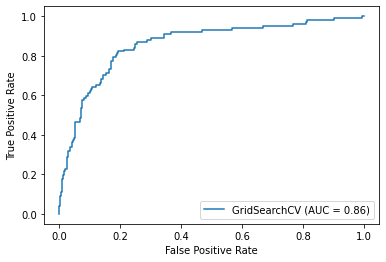

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

- ROC ( *Receiver Operator Characteristic Curve*)  is a probability curve and AUC represents degree or measure of separability

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       566
           1       0.43      0.79      0.56       101

    accuracy                           0.81       667
   macro avg       0.69      0.80      0.72       667
weighted avg       0.88      0.81      0.83       667



$$\Large  F1=\frac {2*(precision* recall)}{precision + recall}$$

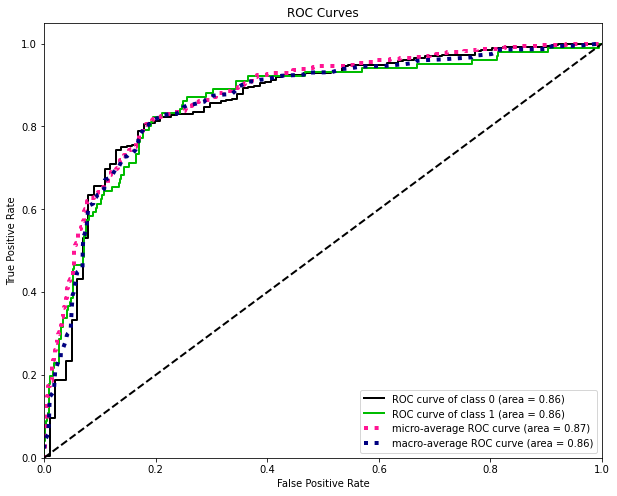

In [ ]:
y_probas = gridSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


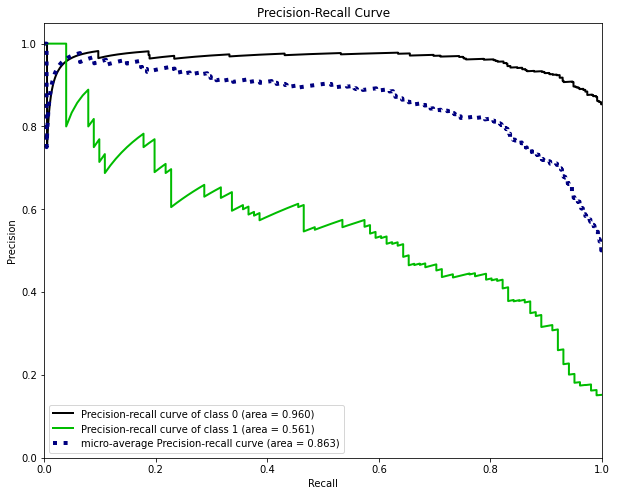

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probas, figsize=(10, 8))
#ConfusonMattrix: Churn Customers in Green

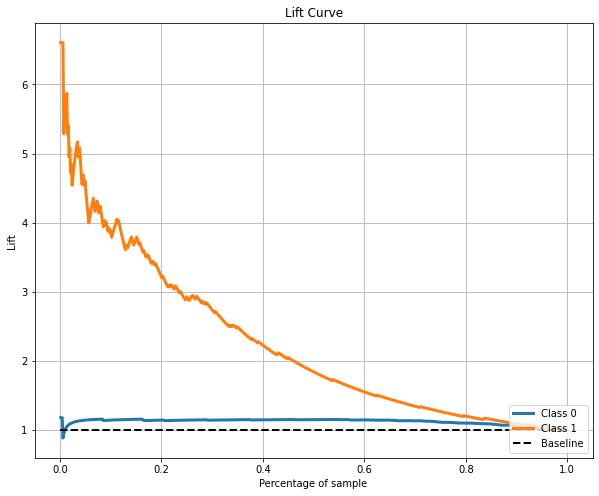

In [ ]:
# Lift is a measure of the effectiveness of a predictive model calculated as
#the ratio between the results obtained with and without the predictive model.
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize=(10, 8))

#### Test Plot_lift_curve

In [ ]:
%matplotlib inline
"""
An example showing the plot_lift_curve method used
by a scikit-learn classifier
"""
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data
# Import scikit-plot
import scikitplot as skplt

In [ ]:
X, y = load_data(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_lift_curve(y_true=y, y_probas=probas)
plt.show()

### RandomizedSearchCV

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3,
                                n_jobs=-1 ,scoring= 'accuracy'  , n_iter=1000 ) # refit="recall_score" )

In [ ]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 17.3min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81baa9190>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'pca__n_components': [30, 40, 50],
                                        'xgbclassifier__colsample_bytree': [0.1,
                                                                            0.2],
                                        'xgbclassifier__gamma': [0.0, 0.1, 0.2],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2],
                                        'xgbclassifier__max_depth': range(3, 5),
                                        'xgbclassifier__n_estimators': [50, 100,
                                                                        150],
                                        'xgbclassifier__scale_pos_weight': [1,
                                                                            10,
                                                                            25,
                                                                            50,
                                                                            75]},
                   scoring='accuracy', verbose=3)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_

In [ ]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

In [ ]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
f'Best AUC Score: {RdSearch.best_score_ :.3}'


In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

In [ ]:
#
y_probas = RdSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [ ]:
y_probas = RdSearch.predict_proba(X_test)
y_probas[:3]

In [ ]:
# AUC
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# Dataset display
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

## A